# Подробнее про TF-IDF

TF-IDF — это способ оценить, насколько слово важно в документе относительно всех других документов.


- TF (term frequency) — насколько **часто** слово встречается **внутри конкретного документа**.
Если слово встречается много раз в документе — оно, возможно, важно.

- IDF (inverse document frequency) — насколько **редко** это слово встречается **во всём корпусе документов**.

> Если слово встречается почти везде (например, “и”, “на”, “this”), — оно не важное.

Немного про DF:
- **логарифм** нужен чтобы сгладить влияние редких слов и не дать IDF разрастись до огромных значений, которые испортят баланс TF-IDF, - он делает числа ближе, но сохраняет порядок важности
- Про деление $N$ на $DF$:
1. если слово встречается во многих документах, то $DF$ большой -> $IDF$ маленький -> слово менее важное;
2. если слово встречается в малом количестве документов -> $DF$ маленький -> $IDF$ большой -> слово хорошо “отличает” документ

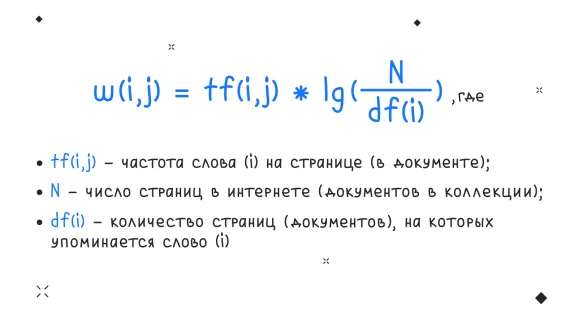

# Метрики расстояния

**Евклидово** - прямое расстояние “по линейке”.
- признаки числовые
- расстояния по оси имеют физический смысл

Нежелательно:
- есть категориальные признаки
- разные признаки меют разные масштабы

Особенности:
- чувствительно к выбросам
- подразумевает, что признаки независимы и одинаково значимы

**Манхэттенское** - расстояние, проходящее “по кварталам”, нельзя пойти наискосок.
- данные разреженные
- есть выбросы

Особенности:
- линейно наказывает за отклонение, без квадрата
- лучше описывает вытянутые/ромбовидные кластеры (из-за суммарных абсолютных смещений по координатам)

**Косинусное** - не расстояние в обычном смысле, а разница углов между векторами.
- важны отношения между признаками, а не сами значения
- работа с текстом

> Смысл косинусного расстояния — оценить сходство ориентиров (направлений) векторов без учёта их абсолютных значений (длин), т.к.  важна именно направленность вектора, распределение значений по признакам, отражающее тематику или смысл


**Гауэра (Gower)** - для смешанных данных. Способ измерения сходства или различия между двумя объектами, особенно когда у них есть как числовые, так и категориальные признаки. Рассчитывается как средневзвешенное расстояние по всем признакам: для числовых признаков используется евклидово расстояние, а для категориальных — расстояние Жаккара или другой подходящий метод

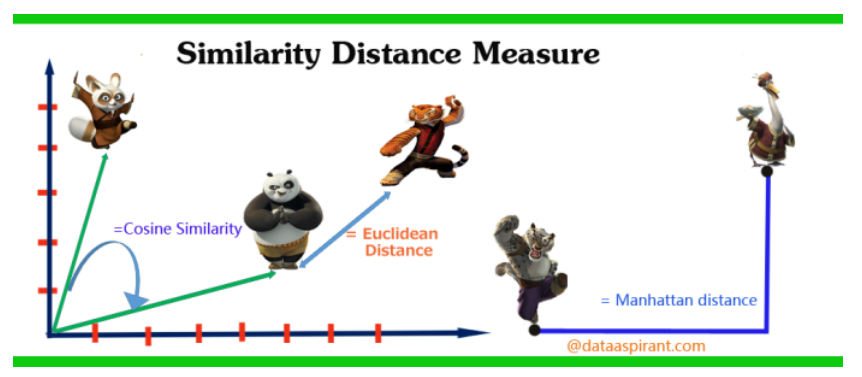

# Сводная таблица

| Тип данных / Задача                   | Лучшая метрика | Подходящие алгоритмы                    | Почему                                                        |
| ------------------------------------- | -------------- | --------------------------------------- | ------------------------------------------------------------- |
| **Чисто числовые, масштабированные**  | Евклидовое         | K-means, Hierarchical              | Простая геометрия, хорошо работает со средними                |
| **Числовые с выбросами**              | Манхэттенское      | K-medoids, DBSCAN                       | Устойчиво к крупным выбросам                                  |
| **Текст, TF-IDF, sparse**             | Косинусное        | Spherical K-means, Hierarchical, DBSCAN | Масштаб не важен, важен угол между векторами. Стандарт в NLP. Не требует нормировки длины                |
| **Категориальные**                    | Хэмминга        | K-medoids, Hierarchical                 | Считает несоответствия категорий                              |
| **Смешанные (число+категории)**       | Gower          | K-medoids, Hierarchical, DBSCAN         | Объединяет разные типы признаков                              |
| **Числовые с сильными корреляциями**  |   Махаланобиса  | GMM, Hierarchical                       | Учёт ковариаций (учитывает корреляции между признаками) |                              |
| **Высокомерные векторы (эмбеддинги)** | Косинусное        | Spherical K-means, DBSCAN               | Евклид в high-dimensional теряет смысл                        |


# Метрики кластеризации внутренние

https://neerc.ifmo.ru/wiki/index.php?title=%D0%9E%D1%86%D0%B5%D0%BD%D0%BA%D0%B0_%D0%BA%D0%B0%D1%87%D0%B5%D1%81%D1%82%D0%B2%D0%B0_%D0%B2_%D0%B7%D0%B0%D0%B4%D0%B0%D1%87%D0%B5_%D0%BA%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D0%B8#.D0.A1.D0.B8.D0.BB.D1.83.D1.8D.D1.82_.28.D0.B0.D0.BD.D0.B3.D0.BB._Silhouette.29

## Индекс силуэта

**Индекс силуэта** измеряет, насколько хорошо объект "вписывается" в свой кластер по сравнению с его ближайшим соседним кластером. Эта метрика оценивает "компактность" кластера (насколько объекты внутри кластера похожи) и "разделимость" (насколько далеко объекты одного кластера от объектов других кластеров).

**Значение коэффициента силуэта $S_i$ для отдельного объекта $i$**:

$$ s(i) = \frac{b_i - a_i}{max(a_i, b_i)}$$

Для объекта 𝑖 вычисляется два ключевых параметра:
* $a_i$ — среднее расстояние между объектом 𝑖 и всеми другими объектами в его кластере. Это называется внутрикластерным расстоянием и отражает, насколько объект близок к своему кластеру.

* $b_i$ — минимальное среднее расстояние между объектом 𝑖 и объектами из любого другого кластера. Т.е. для объекта $i$ из кластера $C$ вычисляется среднее расстояние до каждого другого кластера $C_j$ и берется наименьшее. Это межкластерное расстояние, которое оценивает, насколько объект удален от ближайшего кластера.
> Если $S(i)$ близко к 1, это означает, что объект хорошо "вписывается" в свой кластер.
> Если $S(i)$ близко к 0, объект находится на границе между кластерами.
Отрицательные значения $S(i)$ указывают, что объект, вероятно, неправильно классифицирован и ближе к другому кластеру.


## Силуэт для оценки количества кластеров

Глобальный силуэт - итерируемся по $k$ кластерам по всем точкам каждого кластера:

$$S(N) = \frac{1}{N} \sum_{i=1}^N s(i)$$

$N$ - общее количество объектов (точек) во всех кластерах.

Для разных значений $k$ (числа кластеров) реализуется кластеризация, для каждого варианта вычисляется свой средний силуэт $S(k)$.

Затем строится график $S(k)$ от $k$ и выбирается максимальное значение — это и есть оптимальное число кластеров

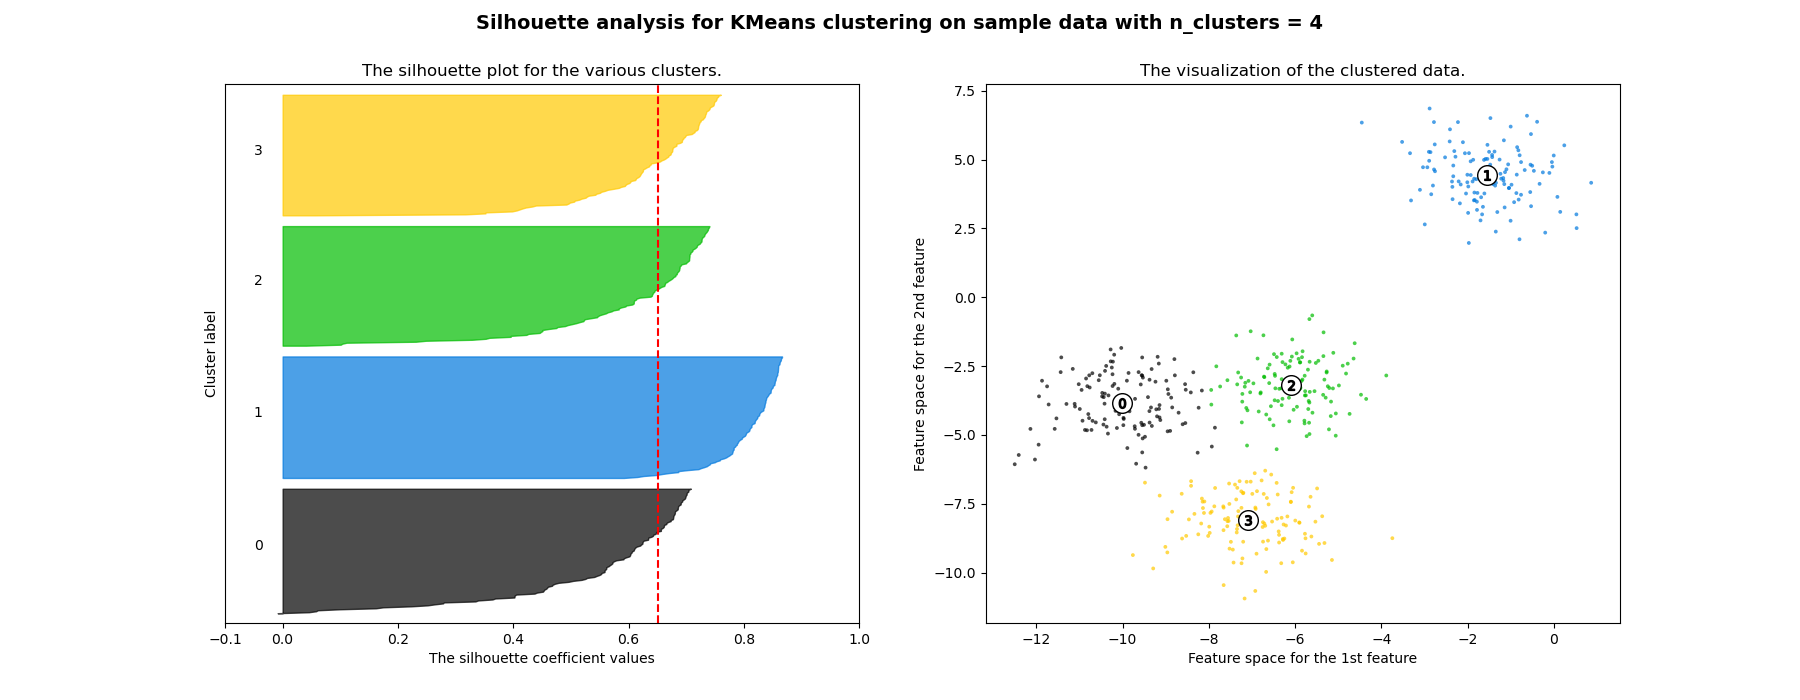

Как читать график:

- для каждой точки сначала считается её индивидуальный $s(i)$

- на silhouette plot все точки одного кластера кладутся в одну «полосу», отсортированные по $s(i)$ - визуально получается силуэт кластера, но это просто набор точечных значений

- красная вертикальная пунктирная линия — это уже глобальный средний силуэт по всем точкам (среднее $s(i)$ по всей выборке), он один для данного разбиения

## Калински-Харабаша



> «хорошие» кластеры дают большую дисперсию между кластерами и маленькую дисперсию внутри кластеров

**Внутрикластерная** дисперсия - для каждого кластера считаем, насколько точки далеки от его центра.

$$ SS_W = \sum_{k=1}^K \sum_{i \in C_k} || x_i - \mu_k||^2$$

- $\mu_k$ - центр кластера
- $k$ - количество кластеров

> насколько точки разбросаны внутри своих кластеров

**Межкластерная** дисперсия - насколько центры кластеров далеко от центра всех данных.

$$ SS_B = n_k \sum_{k=1}^K  ||\mu_k - \mu||^2$$

- $n_k$ - число точек в кластере
- $\mu_k$ - центр кластера
- $\mu$ - глобальный центр

$$CH = \frac{дисперсия_{межкластерная}}{дисперсия_{внутрикластерная}} * \frac{n-k}{k-1}$$
$n$ — общее количество точек данных,
$k$ — количество кластеров.

## Индекс Дэвиса-Болдина

Среднее внутрикластерное расстоние -  это среднее расстояние от точек кластера $i$ до его центра:

$$ S_k = \frac{1}{n_k} \sum||x-c_k||$$

- $n_k$ - количество точек в кластере
- $c_k$ - центр кластера

**Индекс Дэвиса-Болдина** определяется как среднее “сходство” между кластерами, где сходство – это отношение суммарного внутрикластерного рассеяния к расстоянию между центрами кластеров. При этом для каждого кластера берут худшую (максимальную) пару $j$, т.е. то есть «на кого этот кластер больше всего похож / с кем сильнее всего сливается»:

$$ DBI = \frac{1}{k} \sum_{i=1}^k max_{j \neq i} {\frac{S_i + S_j}{M_{ij}}}$$

> Если кластеры очень плотные и далеко друг от друга, дробь маленькая; если размытые и близко, дробь большая.

# Метрики кластеризации внешние. Rand Index


RI измеряет долю согласованных пар объектов — это те пары объектов, которые либо находятся в одном кластере в обеих кластеризациях, либо в разных кластерах в обеих кластеризациях.

- $a$ - количество пар объектов, которые находятся в одном кластере в обоих разбиениях
> аналогично **TP** (true positives), когда оба объекта правильно отнесены к положительному классу
- $b$ - количество пар объектов, которые находятся в разных кластерах в обоих разбиениях
> аналогично **TN** (true negatives), когда оба объекта правильно отнесены к отрицательному классу

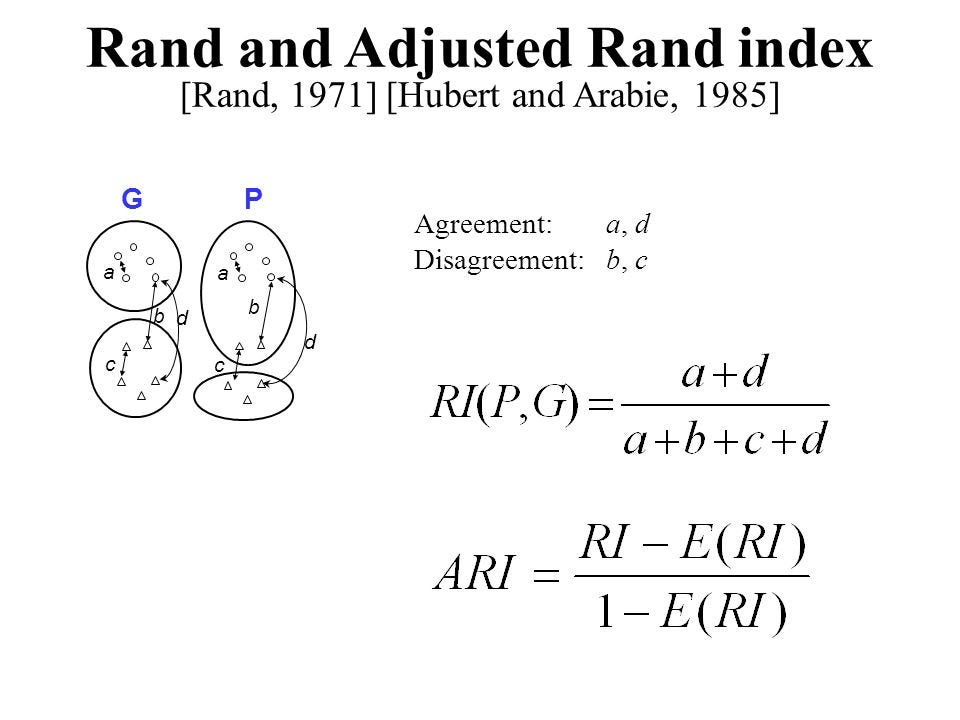

# Особенности алгоритмов

https://scikit-learn.org/stable/modules/clustering.html - картинка с наглядной визуализацией + таблица применимости



## KMeans

Кластер задаётся центроидом — средним всех точек в кластере. Алгоритм **минимизирует суммарную квадратичную ошибку расстояний точек до центров своих кластеров**.
- **только евклидово** расстояние
- ориентирован на шарообразные кластеры
- плохо работает с категориями

Набор точек $X = ${$x_1, ..., x_n$}

Разбиение на кластеры $C = ${$C_1, .., C_k$}, $\mu_j$ - центроид $j$-го кластера

Минимизируем квадрат $L2$-нормы (евклидовой нормы):

$$ V = \sum_{j=1}^k \sum_{x \in C_j} ||x-\mu_j||^2_2$$

где $\mu_j$ - центроид кластера $C_j$:

$$ \mu_j = \frac{1}{C_j} \sum_{x_i \in C_j}x_i$$

то есть центроид — просто среднее арифметическое точек кластера.


**По шагам**:

1. Вычисляем *текущие* центроиды кластеров $\mu_j$ (или берем начальные значения)

2. Для каждой точки $x$ ищем кластер $C_j$, к центроиду которого расстояние по $L2$-норме минимально:

$$ j = arg \space \underset{i}{min} ||x-\mu_i ||^2$$

3. Высчитываем минимизируемый функционал $V$

4. Считаем новые центроиды $\mu_i, i = 1, .., k$ кластеров как среднее точек в кластере, переносим в них "центр тяжести" кластера

5. Повторяем 2-4 до критерия сходимости



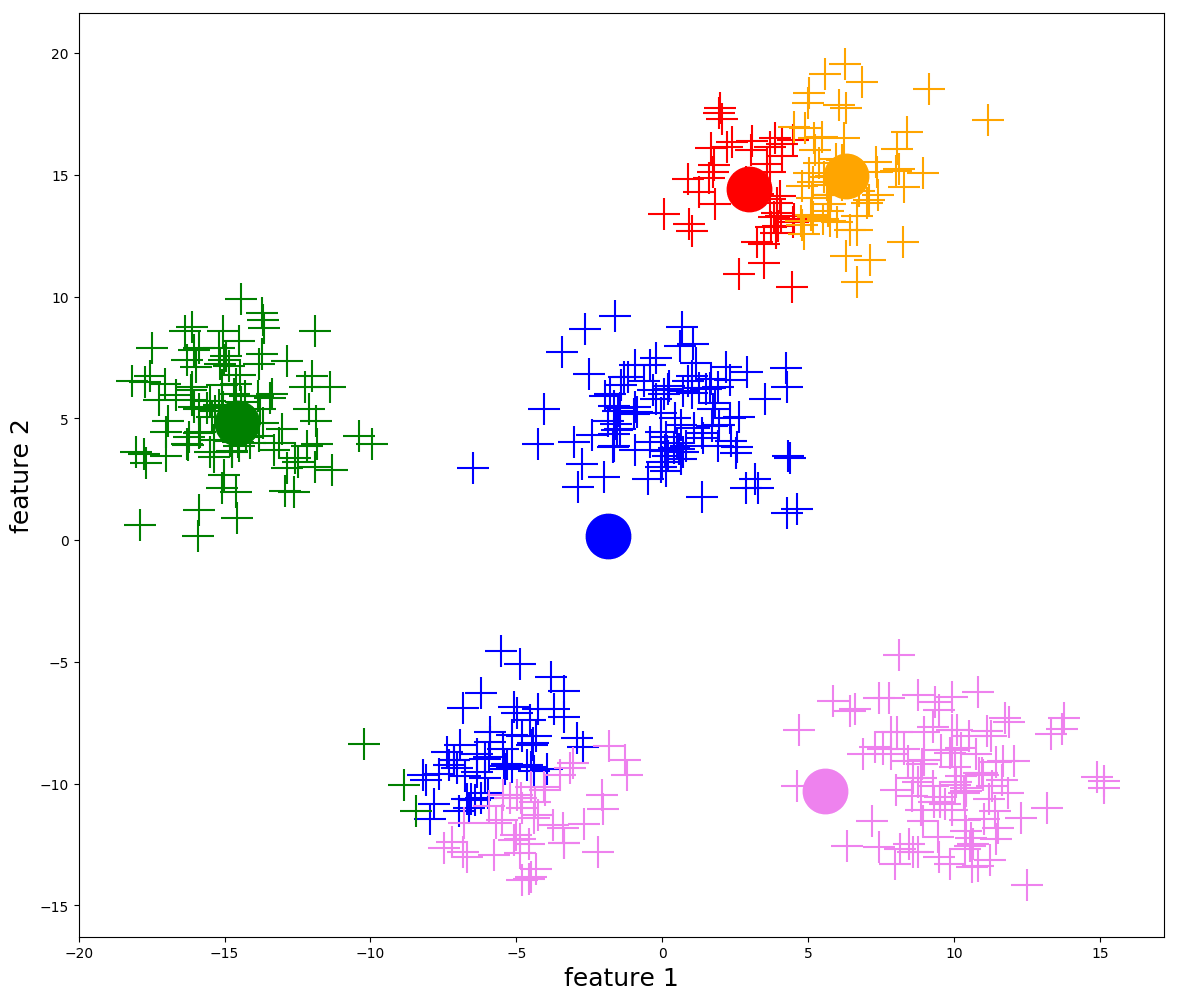

## K-Medoids

Вариация алгоритма K-Means с устойчивостью к шуму. Кластер задаётся **медоидом** — **реальной точкой из набора данных**, наиболее «центральной».

> Минимизируется сумма расстояний, но без среднего.

При L1-норме или произвольных метриках **медоид** — реальная точка -> выброс либо станет медоидом сам, **либо будет отнесён к другому кластеру**. Сильного смещения центра не происходит.

Минимизируем:

$$ \underset{C, m}{min} \sum_{j=1}^k \sum_{x_i \in C_j} d(x_i, m_j)$$

$d$ - метрика расстояния между точками, $m_j$ - медоид кластера $C_j$

**Алгоритм похож на классический K-Means, но с особенностями**:
- для каждого кластера перебираются все точки внутри кластера как потенциальные новые медоиды
- для каждой кандидатуры медоида вычисляется сумма расстояний от него до всех точек кластера, где точка с минимальной суммой расстояний становится новым медоидом
- повторение переназначения точек и обновления медоидов до тех пор, пока медоиды не перестанут меняться или не будет достигнут заданный критерий остановки


Оптимален тем, что **может использовать другую метрику расстояния** - например, манхеттенское.

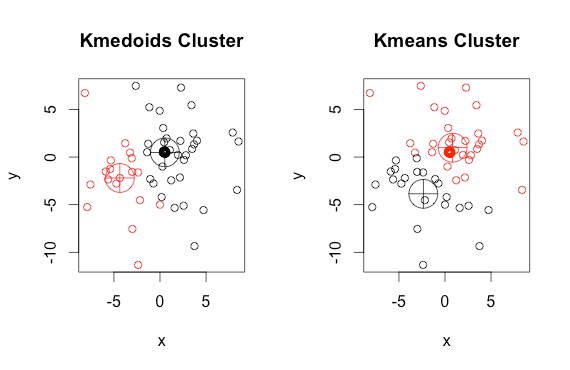

## DBSCAN / HDBSCAN

**HDBSCAN** — это «иерархический DBSCAN», который автоматически подбирает плотности и лучше работает с кластерами разной плотности, тогда как классический DBSCAN требует ручного `eps` и плохо справляется с сильно различающейся плотностью кластеров.
- основной параметр — `min_cluster_size` (минимальный размер кластера); `eps` явно задавать не нужно, алгоритм сам сканирует расстояния, что снижает чувствительность к ручной настройке.

> DBSCAN хорошо находит кластеры произвольной формы, но **предполагает, что у всех кластеров примерно одинаковая плотность**.​ При наличии областей с сильно разной плотностью часто приходится подбирать `eps` «вручную» под конкретный диапазон и мириться с тем, что часть структур не будет найдена.


## Hierarchical

**Дивизионная**

Дано множество точек $X = ${$x_1, x_2, ..., x_n$}$ $

1. Стартуем с одного кластера и рекурсивно делим каждый кластер на 2, так, чтобы получить $C = ${$C_1, ..., C_k$}

2. Оптимизируем качество разбиения (разреза):

Тут есть варианты, как можно считать:

- с помощью K-Means/K-medoids при K=2
- внутри кластера $C$ рассматриваются все возможные разбиения на $C_1$ и $C_2$ с помощью подсчета:
  - уменьшение внутрикластерной суммы квадратов
  - увеличение межкластерной дисперсии
  - или отношение «межкластерная / внутрикластерная»



**Агломеративная**

$$ (C_1, C_2) = arg \space min \space Q(C_1, C_2)$$

где $Q$ - linkage-функционал, только применённый к склейке.

> мы перебираем все возможные способы соединить в кластер на два кластера $C_1$ и $C_2$
и выбираем те, где целевая функция $Q$ минимальна

| Linkage     |  $Q(C_1, C_2)$ выглядит как     |
| ------------- | ------------------------------- |
| Ward          | $SSE(C_1) + SSE(C_2)$     |
| Single-link   | $(\min d(x,y))$ между $C_1$ и $C_2$       |
| Complete-link | $(\max d(x,y)) $                  |
| Average-link  | среднее $(d(x,y)) $               |

## Ward Linkage

- правило слияния в агломеративной иерархической кластеризации, которое на каждом шаге выбирает такую **пару кластеров, объединение которых минимально увеличивает внутрикластерную дисперсию**. Это принципиально отличает его от single/complete/average, которые работают напрямую с расстояниями между точками.


$SSE$ (sum of squared errors, сумма квадратов отклонений) - измеряет **сумму квадратов расстояний всех объектов внутри кластера до его центра** (среднего)

$$ SSE(C) = \sum ||x - \mu_C||^2$$

Для двух кластеров вычисляется прирост ошибки при слиянии:
$$ \Delta SSE = SSE(C) - \sum_{x \in C_1} ||x-\mu_1||^2 - \sum_{x \in C_2} ||x-\mu_2||^2 $$
И алгоритм выбирает пару кластеров с минимальным $\Delta$

> Смысл связи: всегда выбираем такое слияние, которое наименее портит компактность кластеров, т.е. подгруппы были максимально компактными и точки внутри них были близко друг к другу


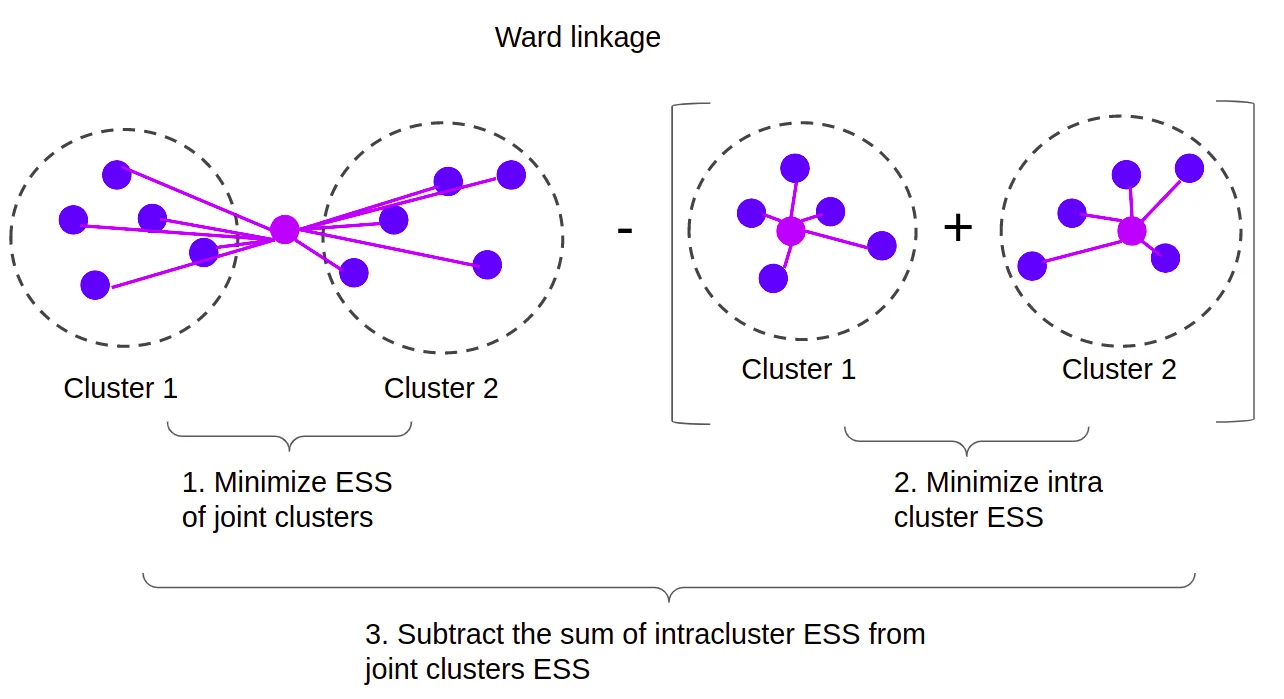